# Cartopy recipes

This notebook demonstrates basic Cartopy usage and explores some useful techniques for making research maps.

***

Cartopy can be installed manually into your current conda environment (should ultimately be added to `environment.yaml`).

```bash
$ conda install -c conda-forge cartopy
```

Additional resources

   * Cartopy docs [https://scitools.org.uk/cartopy/docs/latest](https://scitools.org.uk/cartopy/docs/latest)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature

%matplotlib inline

In [2]:
plt.rcParams['font.size'] = 12

***

## Basic examples

There are multiple ways to invoke a `cartopy` projection in `pyplot`, I prefer `pyplot.subplots` so that's what we'll do here, using the `subplot_kw` argument. Also, start with the basic Plate Carrée projection.

Basic map

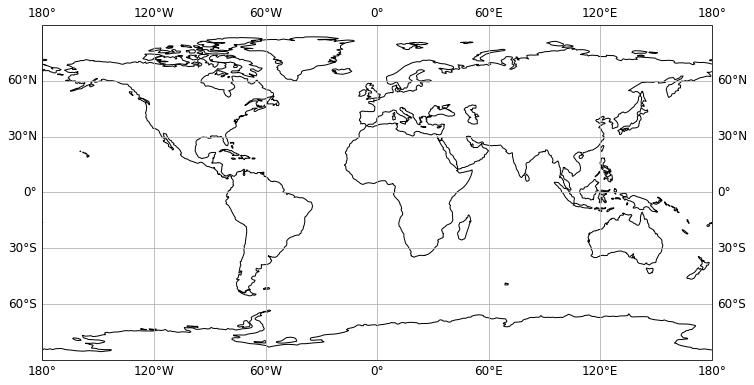

In [3]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs.PlateCarree()})
ax.coastlines()
ax.gridlines(draw_labels=True)

Add features. Cartopy uses the Natural Earth data set as a default resource.

[https://www.naturalearthdata.com/](https://www.naturalearthdata.com/)

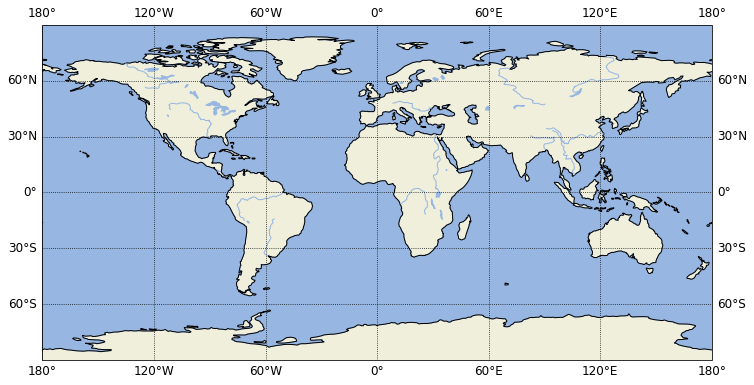

In [4]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs.PlateCarree()})
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE)
ax.add_feature(feature.RIVERS)
ax.add_feature(feature.LAKES)
ax.gridlines(linestyle=':', color='k', draw_labels=True)

***

## Add some complexity

Let's zoom in on the NE Pacific. We'll use the Lambert Conformal projection to minimize distortion.

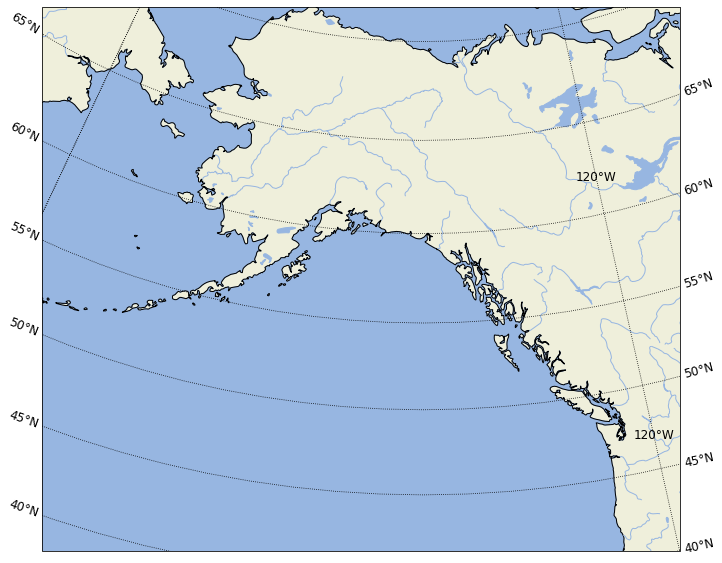

In [5]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': crs.LambertConformal(-140, 40)})
ax.set_extent([-170, -120, 40, 70])
ax.add_feature(feature.LAND)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE)
ax.add_feature(feature.RIVERS)
ax.add_feature(feature.LAKES)
ax.gridlines(linestyle=':', color='k', draw_labels=True)

We would like to improve some aspects of this map.

   1. Increase coastline resolution
   2. Customize colors and grid lines

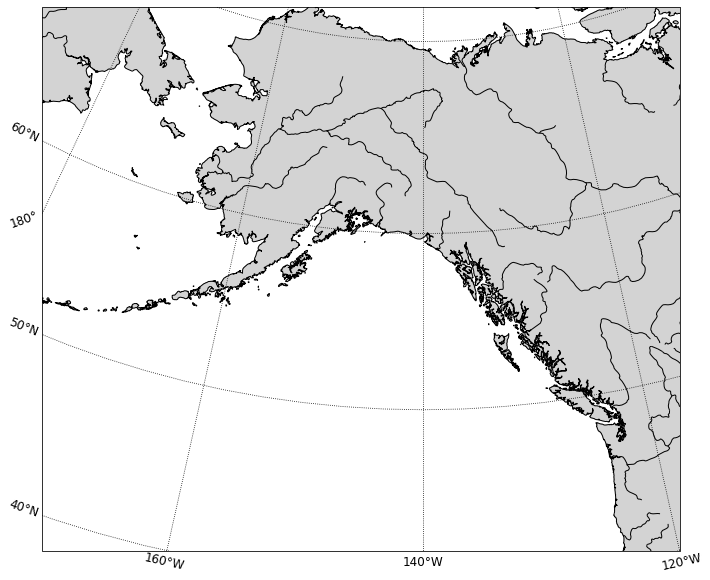

In [6]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': crs.LambertConformal(-140, 40)})
ax.set_extent([-170, -120, 40, 70])
ax.coastlines(resolution='10m')
ax.add_feature(feature.LAND, color='lightgray')
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(
    linestyle=':', color='k', draw_labels=True,
    xlocs=range(-180, -119, 20), x_inline=False,
    ylocs=range(40, 71, 10), y_inline=False,
)
gl.top_labels, gl.right_labels = False, False

Let's look at the Arctic. We'll use the Azimuthal Equidistant projection.

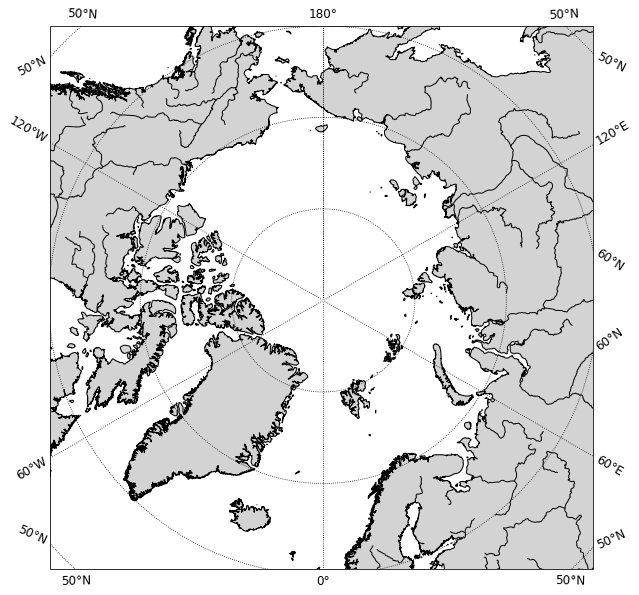

In [7]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': crs.AzimuthalEquidistant(central_latitude=90)})
ax.set_extent([-180, 180, 60, 90], crs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(feature.LAND, color='lightgray')
ax.add_feature(feature.RIVERS, edgecolor='k')
ax.gridlines(linestyle=':', color='k', draw_labels=True)

I wish it were circular. This requires a bit of a hack, but the Cartopy docs have an example.

[https://scitools.org.uk/cartopy/docs/latest/gallery/always_circular_stereo.html](https://scitools.org.uk/cartopy/docs/latest/gallery/always_circular_stereo.html)

Unfortunately grid labels don't work here. This could possibly be hacked, similarly to this example by [Andrew Dawson](https://gist.github.com/ajdawson/dd536f786741e987ae4e).

In [8]:
from matplotlib.path import Path

# Define a circular axis boundary in axes coordinates (i.e., [0, 1])
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = Path(verts * radius + center)

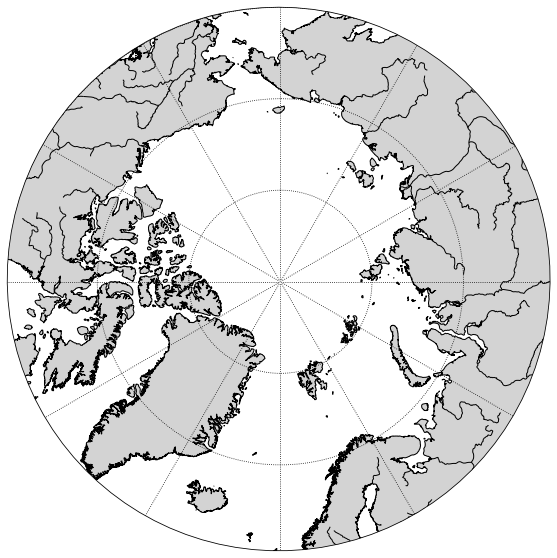

In [9]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': crs.AzimuthalEquidistant(central_latitude=90)})
ax.set_extent([-180, 180, 60, 90], crs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines(resolution='10m')
ax.add_feature(feature.LAND, color='lightgray')
ax.add_feature(feature.RIVERS, edgecolor='k')
ax.gridlines(linestyle=':', color='k', xlocs=range(-180, 180, 30), ylocs=range(60, 90, 10))

***

## Add more data sets

### Coastlines

Let's zoom in even further to the Salish Sea. The Mercator projection does a decent job at this scale.

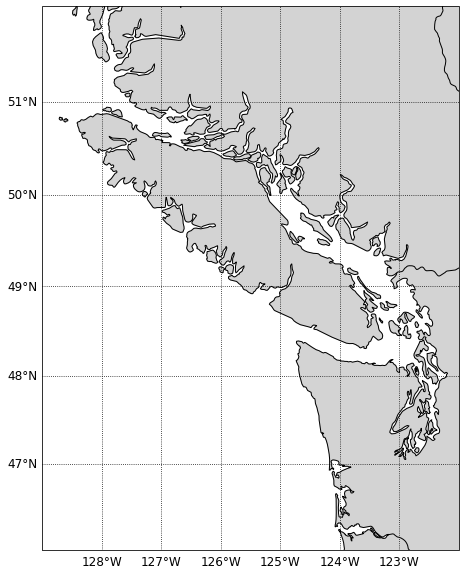

In [10]:
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-129, -122, 46, 52])
ax.coastlines(resolution='10m')
ax.add_feature(feature.LAND, color='lightgray')
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
gl.top_labels, gl.right_labels = False, False

That's pretty good, but the coastline resolution still isn't quite fine enough. We're at the high-res limit of the Natural Earth data available to Cartopy. I like to use GSHHS at this point.

[https://www.ngdc.noaa.gov/mgg/shorelines](https://www.ngdc.noaa.gov/mgg/shorelines)

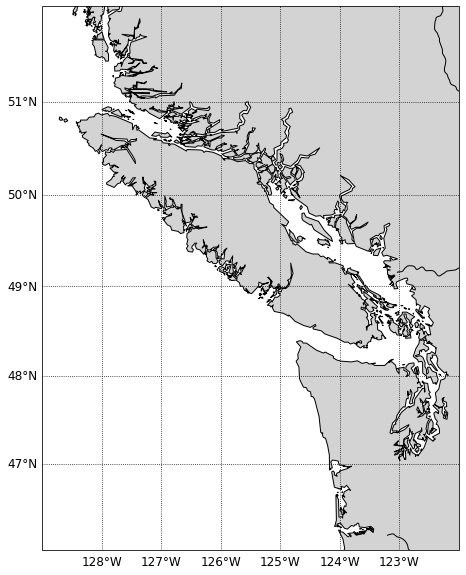

In [12]:
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-129, -122, 46, 52])
ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
gl.top_labels, gl.right_labels = False, False

That's better. How far can we zoom in with GSHHS?

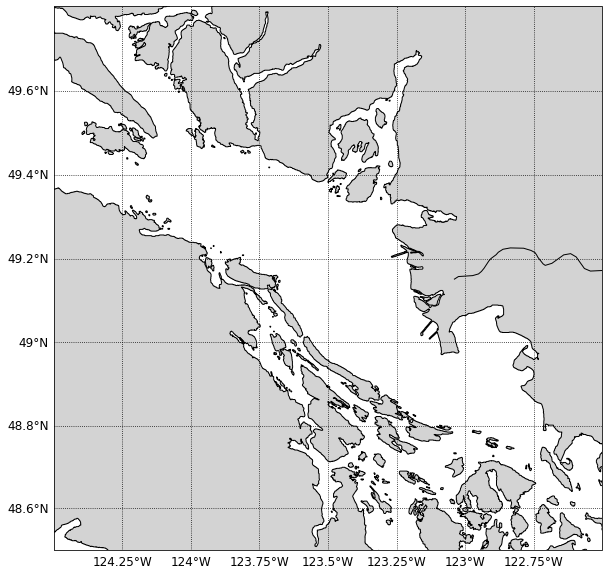

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-124.5, -122.5, 48.5, 49.8])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='lightgray'))
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
gl.top_labels, gl.right_labels = False, False

### Topography

Cartopy doesn't have a built-in interface to topography datasets, so we have to provide this data ourselves. I like to use the ETOPO1 data set.

[https://www.ngdc.noaa.gov/mgg/global](https://www.ngdc.noaa.gov/mgg/global)

Download the data to your preferred storage destination (`wget` on linux, `curl -O` on mac), and extract.

```bash
$ cd /path/to/data

$ wget https://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/bedrock/grid_registered/netcdf/ETOPO1_Bed_g_gmt4.grd.gz

$ gunzip ETOPO1_Bed_g_gmt4.grd.gz
```

The `.grd` file is basically netCDF, which we can open with `xarray`. I'll crop to my study area (Salish Sea) and export to `numpy` here to maximize efficiency.

In [15]:
import xarray as xr

# Load ETOPO1 data set
topo = xr.open_dataset('/path/to/data/ETOPO1_Bed_g_gmt4.grd')

# Crop to Salish Sea
extent = [-129, -122, 46, 52]
topo_salishsea = topo.sel(x=slice(*extent[:2]), y=slice(*extent[2:]))
lon, lat, depth = [topo_salishsea[var].values for var in ('x', 'y', 'z')]

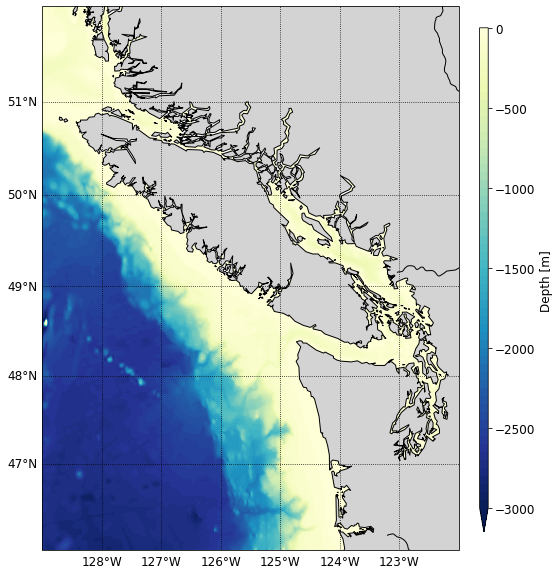

In [16]:
# Make map
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator()})
ax.set_extent(extent)
ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
gl.top_labels, gl.right_labels = False, False

# Plot topography and add colorbar
c = ax.contourf(
    lon, lat, depth, levels=range(-3000, 1, 50),
    cmap='YlGnBu_r', extend='min', transform=crs.PlateCarree(),
)
cax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
fig.colorbar(c, cax=cax, label='Depth [m]', ticks=range(-3000, 1, 500))

Let's go back to the NE Pacific for a larger scale example. The 1 arc-minute resolution of ETOPO1 is overkill at this point, so let's interpolate to 1 degree before plotting.

In [17]:
# Interpolate topo to 1 degree
bbox = [-180, -100, 35, 75]
topo_NEPac = topo.interp(x=np.arange(*bbox[:2], 0.1), y=np.arange(*bbox[2:], 0.1))
lon, lat, depth = [topo_NEPac[var].values for var in ('x', 'y', 'z')]

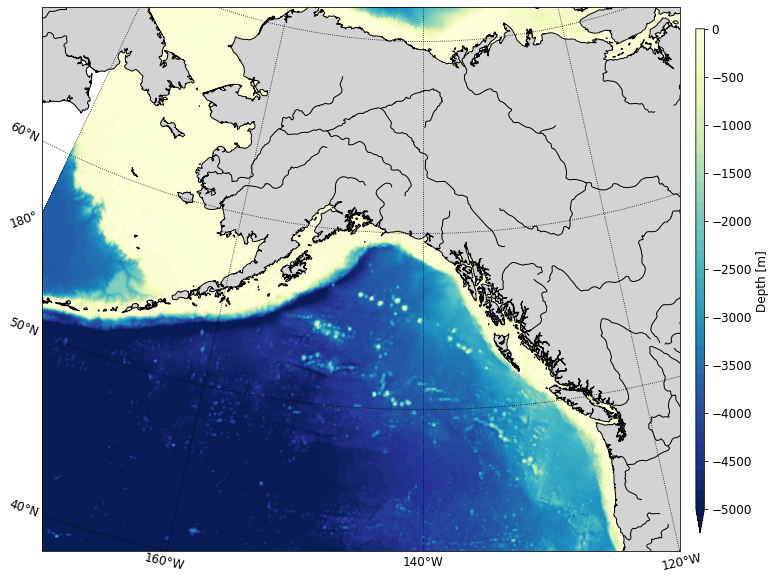

In [18]:
# Make map
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': crs.LambertConformal(-140, 40)})
ax.set_extent([-170, -120, 40, 70])
ax.coastlines(resolution='10m')
ax.add_feature(feature.LAND, color='lightgray')
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(
    linestyle=':', color='k', draw_labels=True,
    xlocs=range(-180, -119, 20), x_inline=False,
    ylocs=range(40, 71, 10), y_inline=False,
)
gl.top_labels, gl.right_labels = False, False

# Plot topography and add colorbar
c = ax.contourf(
    lon, lat, depth, levels=range(-5000, 1, 100),
    cmap='YlGnBu_r', extend='min', transform=crs.PlateCarree(),
)
cax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
fig.colorbar(c, cax=cax, label='Depth [m]', ticks=range(-5000, 1, 500))

### Horizontal fields

Let's use SalishSeaCast for this example. We can load results directly from the SalishSeaCast ERDDAP server using `xarray`. We'll look at 1-Jun-2020.

In [19]:
# Load SalishSeaCast results from ERDDAP
coords = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')
data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05')
lon, lat = [coords[coord].values for coord in ('longitude', 'latitude')]
salinity = data.salinity.sel(time='2020 Jun 1 00:00', depth=0, method='nearest').values

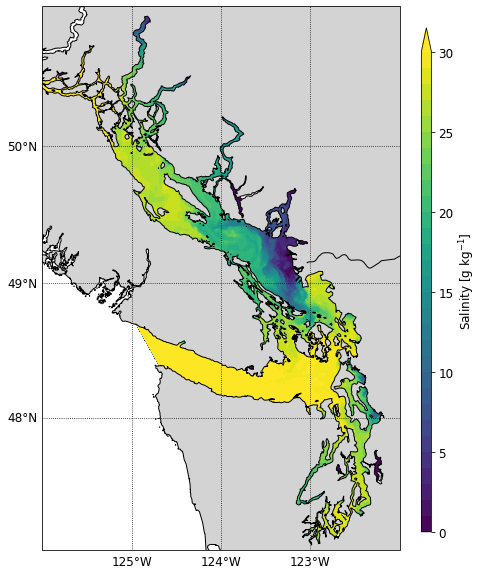

In [22]:
# Make map
fig, ax = plt.subplots(figsize=(7, 10), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-126, -122, 47, 51])
ax.add_feature(feature.GSHHSFeature('high', edgecolor='k', facecolor='lightgray'))
ax.add_feature(feature.RIVERS, edgecolor='k')
gl = ax.gridlines(
    linestyle=':', color='k', draw_labels=True,
    xlocs=range(-126, -121), ylocs=range(47, 52),
)
gl.top_labels, gl.right_labels = False, False

# Plot salinity and add colorbar
c = ax.contourf(
    lon, lat, salinity, levels=range(0, 31, 1),
    cmap='viridis', extend='max', transform=crs.PlateCarree(),
)
cax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
fig.colorbar(c, cax=cax, label='Salinity [g kg$^{-1}$]', ticks=range(0, 31, 5))